## Import Library

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import pandas as pd

%matplotlib inline

In [2]:
white_wine = pd.read_csv('winequality-white.csv')

In [3]:
white_wine.head()
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
# check missing values
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

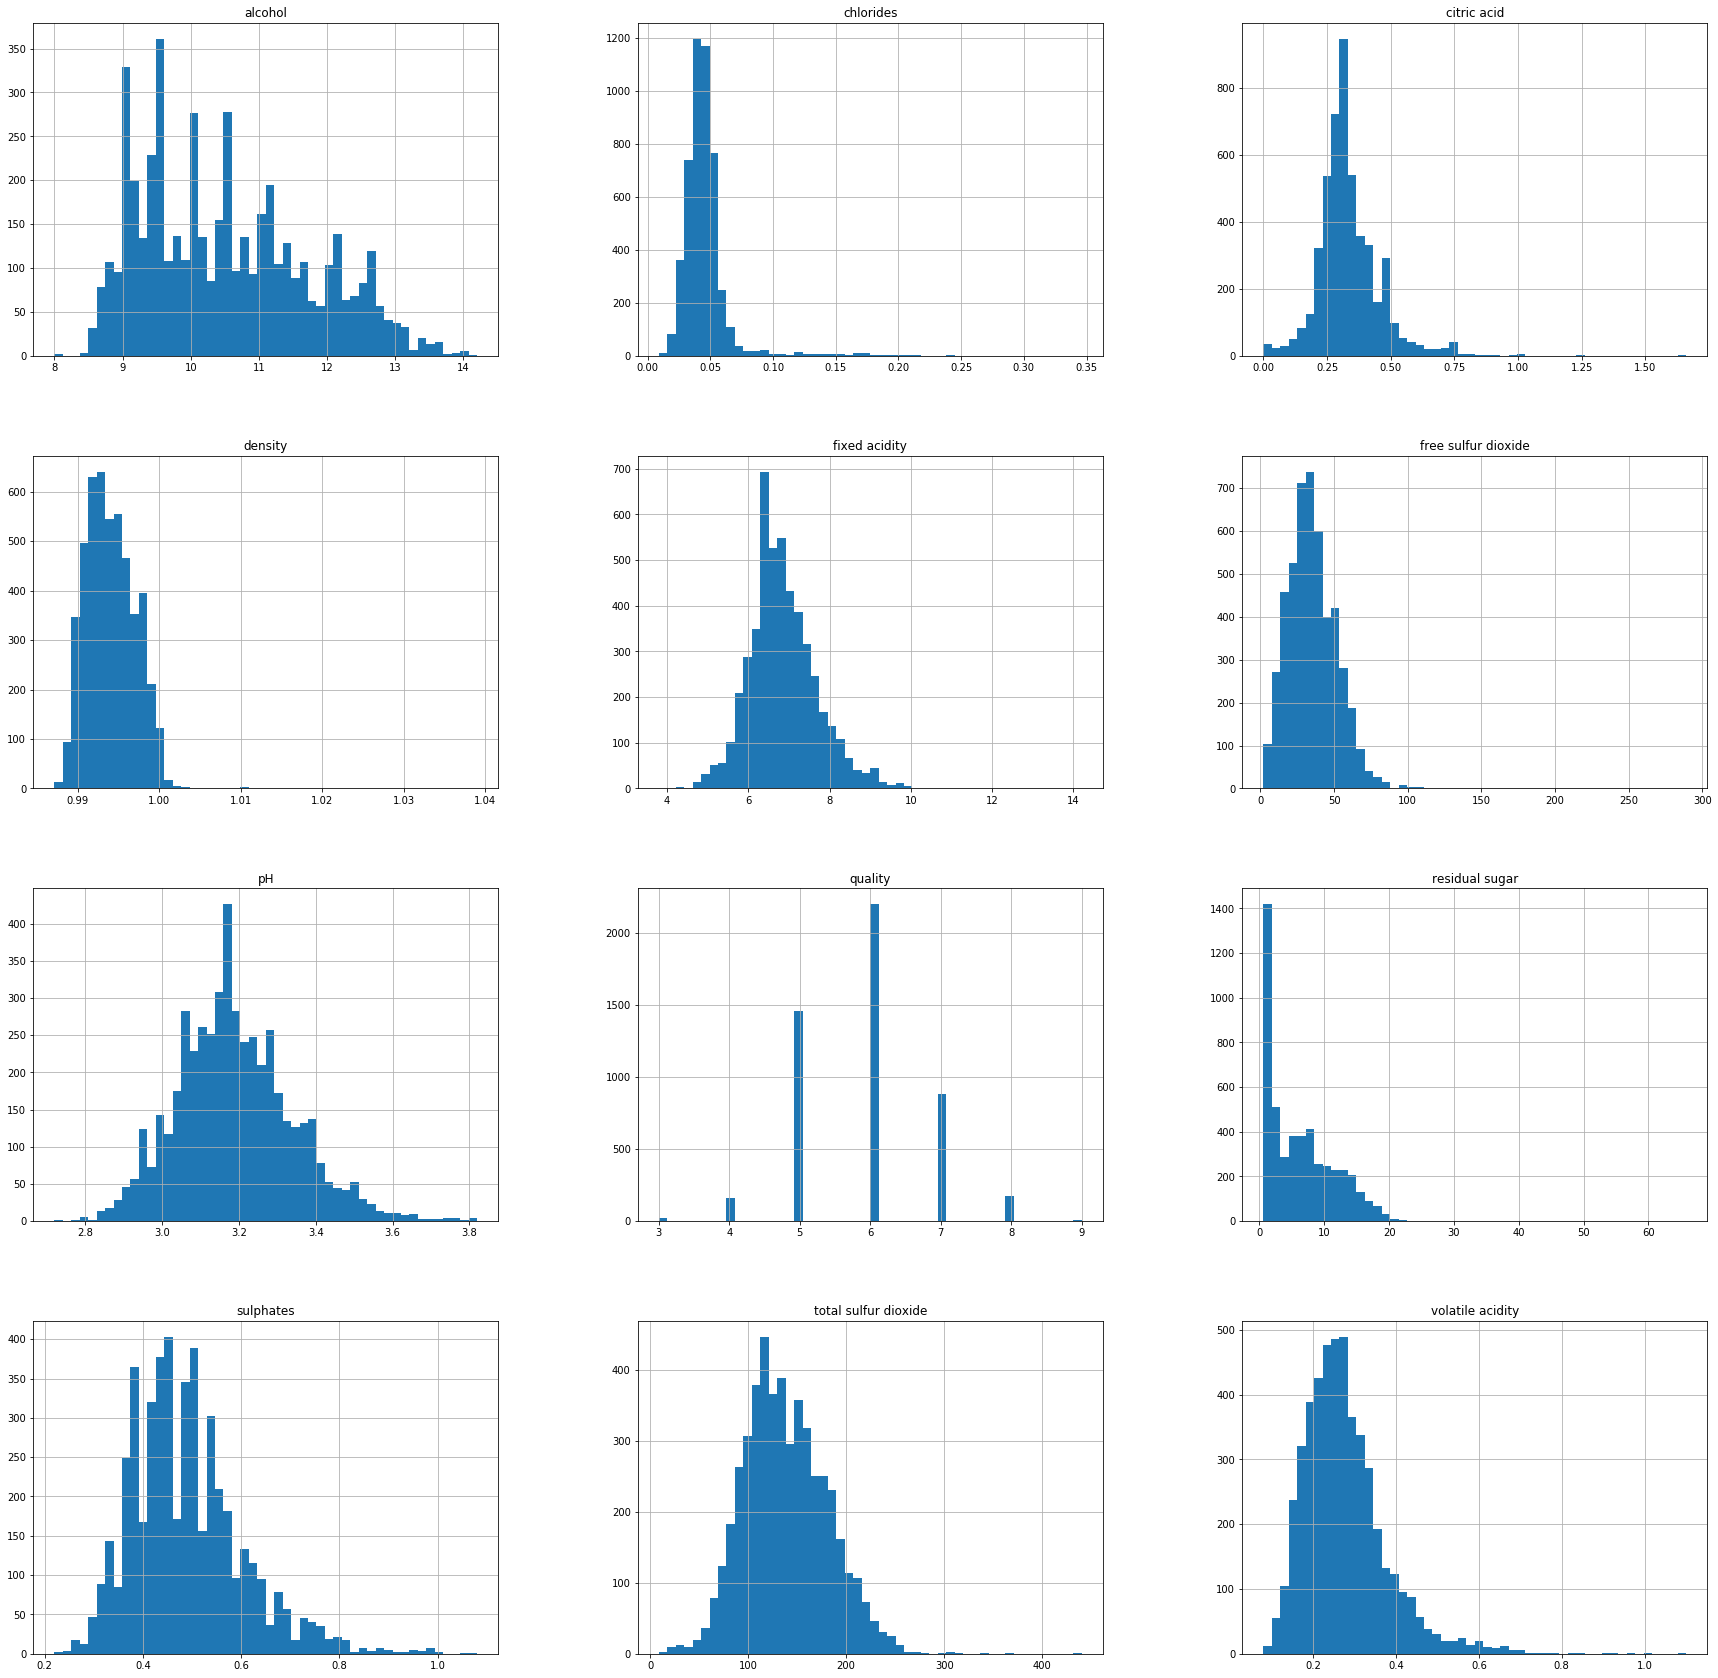

In [7]:
white_wine.hist(bins=50, figsize=(30,30))
plt.show()

## Note:

- The data look clean, no capped value, no missing values.
- The samples for quality <= 3 and >=9 are too little.

In [8]:
# import seaborn as sns

# sns.pairplot(dataset)

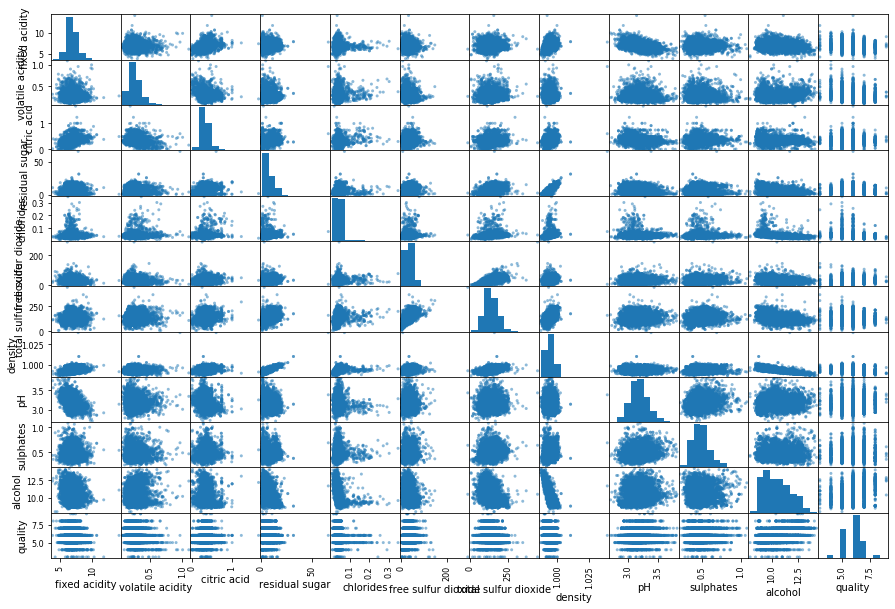

In [9]:
from pandas.plotting import scatter_matrix

_ = scatter_matrix(white_wine, figsize=(15, 10))

In [10]:
# try dropping the samples with quality <=3 or >= 9
white_wine = white_wine[(white_wine.quality <= 8) & (white_wine.quality >= 4)]

In [11]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000
mean,6.851149,0.277995,0.334131,6.393741,0.045756,35.236097,138.251283,0.994026,3.188147,0.489934,10.513253,5.886518
std,0.837109,0.100592,0.121189,5.072535,0.021695,16.445156,42.011360,0.002990,0.150752,0.114136,1.229856,0.862730
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,4.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991730,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,138.500000,344.000000,1.038980,3.820000,1.080000,14.200000,8.000000


In [12]:
# check correlation matrix
corr_matrix = white_wine.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.442808
pH                      0.099749
sulphates               0.054308
free sulfur dioxide     0.024183
citric acid            -0.010867
residual sugar         -0.099011
fixed acidity          -0.108500
total sulfur dioxide   -0.169875
volatile acidity       -0.194541
chlorides              -0.209607
density                -0.309837
Name: quality, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(white_wine, test_size=0.2, random_state=42)

In [14]:
x_train = train_set.drop("quality", axis=1)
y_train = train_set["quality"].copy()

x_test = test_set.drop("quality", axis=1)
y_test = test_set["quality"].copy()

## Try Linear Regression

In [15]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

y_train_pred = regr.predict(x_test)


In [16]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_train_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 7.11057124e-02 -1.85026561e+00 -8.61262337e-02  7.27620231e-02
  9.32019475e-02  4.79320881e-03 -1.91718553e-04 -1.31738433e+02
  5.81359740e-01  5.97443804e-01  2.17547520e-01]
Mean squared error: 0.51


NameError: name 'y_pred' is not defined

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(regr, x_train, y_train, cv=3)

y_train_pred = np.round(y_train_pred,0)

confusion_matrix(y_train, y_train_pred)

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred, average='micro')

In [ ]:
recall_score(y_train, y_train_pred, average='micro')

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred, average='micro')

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train,y_train_pred)

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_round = np.round(y_pred,0).astype(int)

confusion_matrix(y_test, y_pred_round)

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred_round, average='micro')

In [ ]:
recall_score(y_test, y_pred_round, average='micro')

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred_round, average='micro')

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_round)

## Try Ridge Regression

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
clf = linear_model.RidgeCV(alphas=[1e-3,1e-2,1e-1,1])

# Train the model using the training sets
clf.fit(x_train, y_train)


In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_round = np.round(y_pred,0).astype(int)

confusion_matrix(y_test, y_pred_round)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_round)

## Try Feature Selection + Random Forest

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(C=0.01, penalty="l1", dual=False))),
  ('classification', RandomForestClassifier())
])
clf.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=0.01, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     loss='squared_hinge',
                                                     max_iter=1000,
                                                     multi_class='ovr',
                                                     penalty='l1',
                                                     random_state=None,
                                                     tol=0.0001, verbose=0),
                                 max_features=None, norm_order=1, prefit=False,
                                 threshold=None)),
                ('classification',
                 RandomForestClassifier(bootstrap=T

In [23]:
y_pred = clf.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[  5,  18,  10,   0,   0],
       [  3, 223,  82,   5,   0],
       [  5,  81, 314,  32,   1],
       [  0,   8,  68,  89,   1],
       [  0,   1,  11,   5,  13]])

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.6605128205128206